Завдання І рівня складності – максимально 7 балів.
Здійснити синтез математичних моделей та розробити програмний скрипт, що
реалізує базові операції 2D перетворень над геометричними примітивами. Для розробки
використовувати матричні операції та технології композиційних перетворень. Вхідна
матриця координат кутів геометричної фігури має бути розширеною.
<br>Фігура - ромб




Реалізувати операції: обертання –
переміщення – масштабування.
операцію реалізувати циклічно,
траєкторію зміни положення цієї
операції відобразити.

Здійснити синтез математичних моделей та розробити програмний скрипт, що
реалізує базові операції 3D перетворень над геометричними примітивами: аксонометрична
проекція будь-якого типу та з циклічне обертання (анімація) 3D графічного об’єкту навколо
будь-якої обраної внутрішньої віссю. Траєкторію обертання не відображати. Для розробки
використовувати матричні операції. Вхідна матриця координат кутів геометричної фігури
має бути розширеною.
<br>Фігура - паралелепіпед


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tkinter as tk
import time
import random

In [2]:
diamond = np.array([[0, 1, 0, -1],
                    [1, 0, -1, 0],
                    [1, 1, 1, 1]])



In [3]:
def plot_diamond(diamond,color, label):
    plt.plot(np.append(diamond[0], diamond[0][0]), np.append(diamond[1], diamond[1][0]), color, label=label)
    
def rotate(diamond, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0],
                                [np.sin(angle), np.cos(angle), 0],
                                [0, 0, 1]])
    return np.dot(rotation_matrix, diamond)


def translate(diamond, dx, dy):
    translation_matrix = np.array([[1, 0, dx],
                                   [0, 1, dy],
                                   [0, 0, 1]])
    return np.dot(translation_matrix, diamond)


def scale(diamond, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    return np.dot(scaling_matrix, diamond)


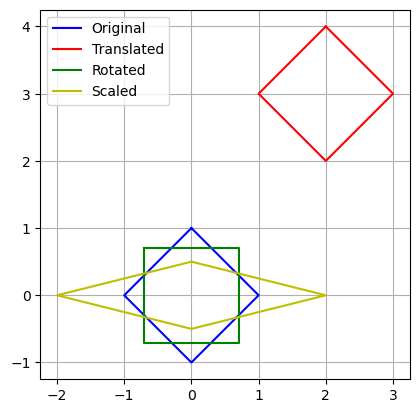

In [4]:
plot_diamond(diamond, 'b', 'Original')

translated_diamond = translate(diamond, 2, 3)
plot_diamond(translated_diamond, 'r', "Translated")

rotated_diamond = rotate(diamond, np.pi/4)
plot_diamond(rotated_diamond, 'g', "Rotated")

scaled_diamond = scale(diamond, 2, 0.5)
plot_diamond(scaled_diamond, 'y', "Scaled")

plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.legend()
plt.show()

In [5]:

diamond_size = 100
diamond = np.array([[-diamond_size/2, 0],
                    [0, -diamond_size/2],
                    [diamond_size/2, 0],
                    [0, diamond_size/2],
                    [-diamond_size/2, 0]])

# Функція для обертання ромба
def rotate(diamond, angle):
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    rotation_matrix = np.array(((c, -s), (s, c)))
    return np.dot(diamond, rotation_matrix)

# Функція для переміщення ромба
def translate(diamond, dx, dy):
    for i in range(len(diamond)):
        diamond[i][0] += dx
        diamond[i][1] += dy
    return diamond

# Функція для масштабування ромба
def scale(diamond, scale_factor):
    for i in range(len(diamond)):
        diamond[i][0] *= scale_factor
        diamond[i][1] *= scale_factor
    return diamond

# Функція для анімації
def animate():
    global diamond
    canvas.delete("all")
    canvas.create_polygon(diamond.flatten().tolist(), outline='blue', fill='')

    # Змінюємо ромб на кожному кадрі
    diamond = rotate(diamond, 20)
    diamond = translate(diamond, 1, 1)
    diamond = scale(diamond, 1.01)
    root.after(50, animate)

root = tk.Tk()
root.title("2D Transformations Animation")

# Створення полотна Tkinter
canvas = tk.Canvas(root, width=1000, height=1000)
canvas.pack()

# Визначення початкової позиції ромба
start_x = 50
start_y = 50
diamond = translate(diamond, start_x, start_y)

# Запуск анімації
animate()

# Запуск головного циклу Tkinter
root.mainloop()


In [6]:
import tkinter as tk
import time

root = tk.Tk()
canvas = tk.Canvas(root, width=400, height=400)
canvas.pack()


def draw_cube():
    vertices = [(150, 50), (250, 50), (350, 150), (250, 150)]
    vertices_bottom = [(150, 250), (250, 250), (350, 350), (250, 350)]
    colors = ["#ff0000", "#00ff00", "#0000ff", "#ffff00", "#00ffff", "#ff00ff"]  # список кольорів

    for color in colors:
        for i in range(4):
            j = (i + 1) % 4
            canvas.create_polygon(vertices[i][0], vertices[i][1], vertices[j][0], vertices[j][1],
                                       vertices_bottom[j][0], vertices_bottom[j][1], vertices_bottom[i][0],
                                       vertices_bottom[i][1], fill=color, outline="black")
        root.update()
        time.sleep(1)
        canvas.delete("cube")  # Видаляємо паралелепіпед

    root.after(2000,draw_cube)  # Запускаємо знову через 2 секунди

draw_cube()
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\tkinter\__init__.py", line 861, in callit
    func(*args)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_7768\3040084159.py", line 22, in draw_cube
    canvas.delete("cube")  # Видаляємо паралелепіпед
    ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\tkinter\__init__.py", line 2879, in delete
    self.tk.call((self._w, 'delete') + args)
_tkinter.TclError: invalid command name ".!canvas"
